In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import json

In [3]:
from evaluation import load_metrics, reformat_rouge, rouge_averages

In [4]:
models = ['samsum_bart_base', 'samsum_bart_cleaned', 'samsum_bart_oov', 'samsum_bart_custom_tokenizer', 'samsum_bart_wsd', 'samsum_bart_wsd_custom_tokenizer', 'samsum_bart_oov_custom_tokenizer']

model_metrics = {}
for model in models:
    model_metrics[model] = load_metrics(model)
    rouge_1 = reformat_rouge(model_metrics[model], 'rouge1')
    rouge_2 = reformat_rouge(model_metrics[model], 'rouge2')
    rouge_l = reformat_rouge(model_metrics[model], 'rougeL')
    
    model_metrics[model]['relevance']['rouge'] = {
        'rouge_1': rouge_1,
        'rouge_2': rouge_2,
        'rouge_l': rouge_l
    }
    

# ROUGE Scores

In [5]:

rouge_avg_df = pd.DataFrame()

for model in models:
    df = rouge_averages(model_metrics[model]['relevance']['rouge'])
    #add a model name column
    df['model'] = model
    
    #add the averages to the dataframe
    rouge_avg_df = pd.concat([rouge_avg_df, df], axis=0)

rouge_avg_df['metric'] = rouge_avg_df.index
rouge_avg_df = rouge_avg_df.reset_index(drop=True)

In [6]:
rouge_avg_df_pivot = rouge_avg_df.pivot(index=['model'], columns=['metric'], values=['Rouge_1', 'Rouge_2', 'Rouge_L'])

In [7]:
rouge_avg_df_pivot

Rouge_1                       Rouge_2  \
metric                                  F1 Precision    Recall        F1   
model                                                                      
samsum_bart_base                  0.507966  0.574039  0.500126  0.259250   
samsum_bart_cleaned               0.509174  0.576558  0.502651  0.262175   
samsum_bart_custom_tokenizer      0.383177  0.487838  0.350062  0.162285   
samsum_bart_oov                   0.505306  0.570393  0.500060  0.251201   
samsum_bart_oov_custom_tokenizer  0.408568  0.487511  0.390139  0.171346   
samsum_bart_wsd                   0.466675  0.541367  0.450830  0.216778   
samsum_bart_wsd_custom_tokenizer  0.353539  0.447165  0.323701  0.124545   

                                                       Rouge_L            \
metric                           Precision    Recall        F1 Precision   
model                                                                      
samsum_bart_base                  0.295216  0.255696  0.419834  0.474781   
samsum_bart_cleaned               0.300815  0.258542  0.422083  0.479200   
samsum_bart_custom_tokenizer      0.216627  0.145624  0.325509  0.416073   
samsum_bart_oov                   0.285559  0.248291  0.415647  0.468116   
samsum_bart_oov_custom_tokenizer  0.210918  0.160877  0.334299  0.398596   
samsum_bart_wsd                   0.255382  0.208552  0.385013  0.446453   
samsum_bart_wsd_custom_tokenizer  0.163789  0.111553  0.284357  0.358247   

                                            
metric                              Recall  
model                                       
samsum_bart_base                  0.413555  
samsum_bart_cleaned               0.416277  
samsum_bart_custom_tokenizer      0.296543  
samsum_bart_oov                   0.412048  
samsum_bart_oov_custom_tokenizer  0.319663  
samsum_bart_wsd                   0.372381  
samsum_bart_wsd_custom_tokenizer  0.261312

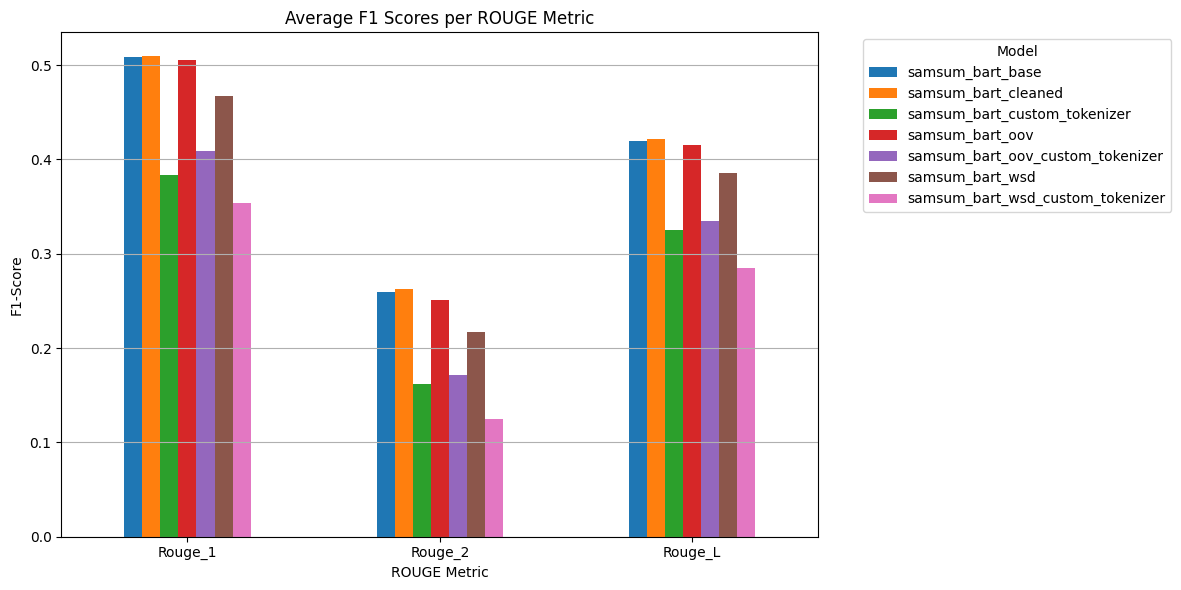

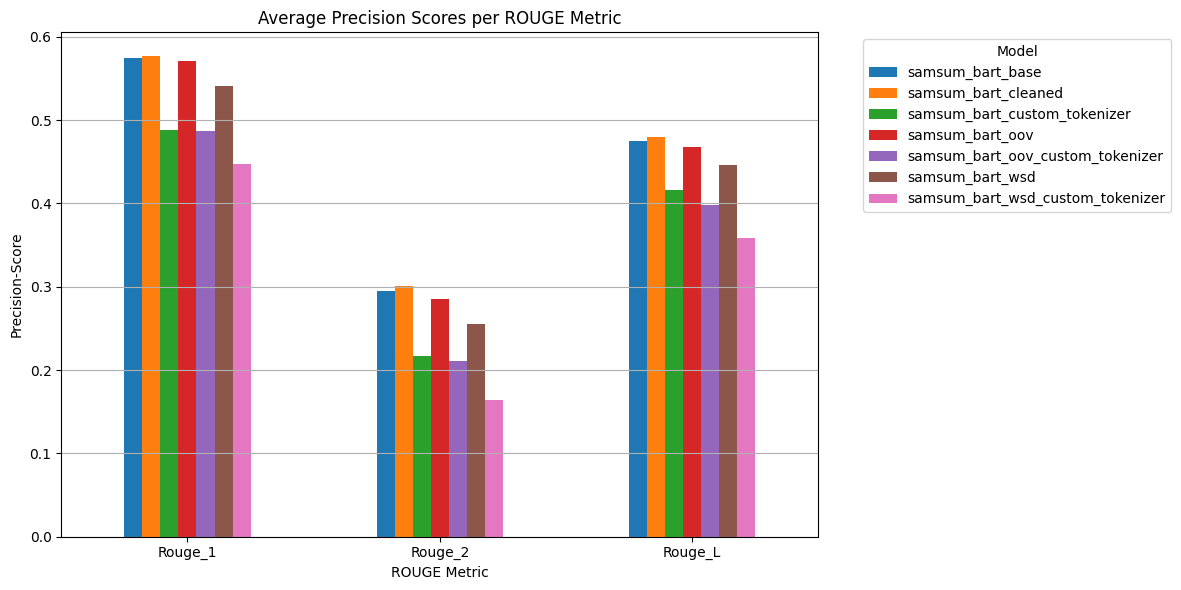

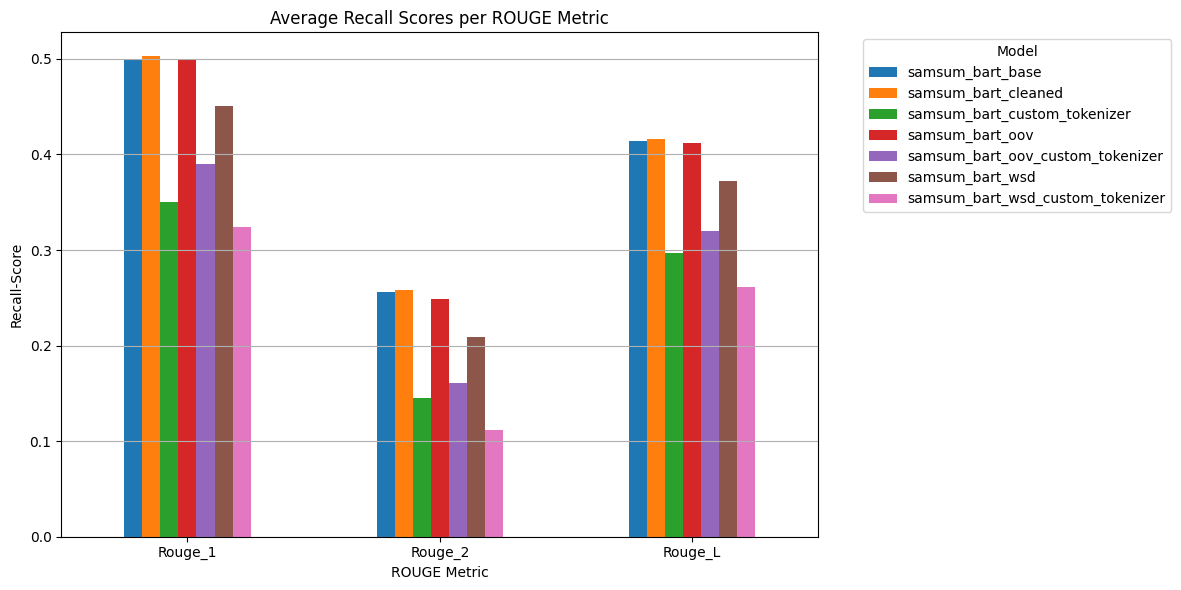

In [8]:
def plot_scores(df, metric, ylabel):
    # Filter by metric
    metric_df = df[df['metric'] == metric]
    
    # Melt the DataFrame to have 'Rouge_Score' and 'Score' columns
    melted_df = metric_df.melt(
        id_vars=['model'],
        value_vars=['Rouge_1', 'Rouge_2', 'Rouge_L'],
        var_name='Rouge_Score',
        value_name='Score'
    )
    
    # Pivot the DataFrame so that 'Rouge_Score' is on the x-axis, and models are columns
    pivot_df = melted_df.pivot(
        index='Rouge_Score',
        columns='model',
        values='Score'
    )
    
    # Plot the bar chart
    ax = pivot_df.plot(kind='bar', figsize=(12, 6))
    
    # Customize the plot
    plt.title(f"Average {metric} Scores per ROUGE Metric")
    plt.ylabel(ylabel)
    plt.xlabel("ROUGE Metric")
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Now, call the function for each metric
plot_scores(rouge_avg_df, 'F1', 'F1-Score')
plot_scores(rouge_avg_df, 'Precision', 'Precision-Score')
plot_scores(rouge_avg_df, 'Recall', 'Recall-Score')

In [9]:
rouge_avg_df

,Rouge_1,Rouge_2,Rouge_L,model,metric
0,0.574039,0.295216,0.474781,samsum_bart_base,Precision
1,0.500126,0.255696,0.413555,samsum_bart_base,Recall
2,0.507966,0.259250,0.419834,samsum_bart_base,F1
3,0.576558,0.300815,0.479200,samsum_bart_cleaned,Precision
4,0.502651,0.258542,0.416277,samsum_bart_cleaned,Recall
5,0.509174,0.262175,0.422083,samsum_bart_cleaned,F1
6,0.570393,0.285559,0.468116,samsum_bart_oov,Precision
7,0.500060,0.248291,0.412048,samsum_bart_oov,Recall
8,0.505306,0.251201,0.415647,samsum_bart_oov,F1
9,0.487838,0.216627,0.416073,samsum_bart_custom_tokenizer,Precision


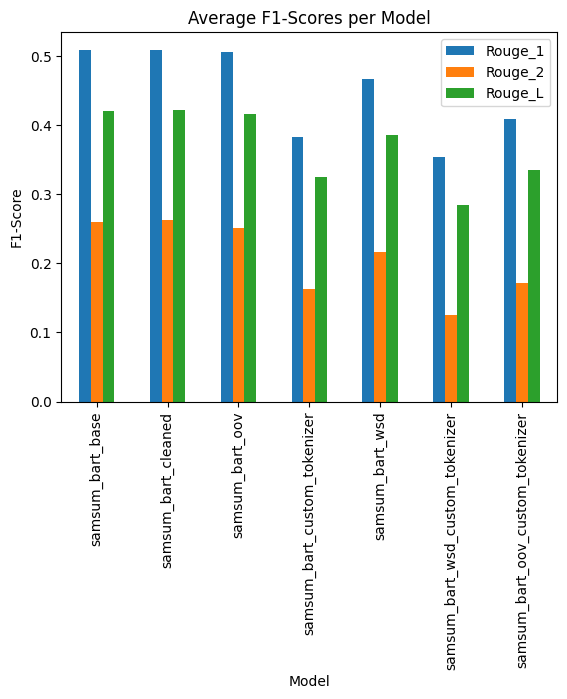

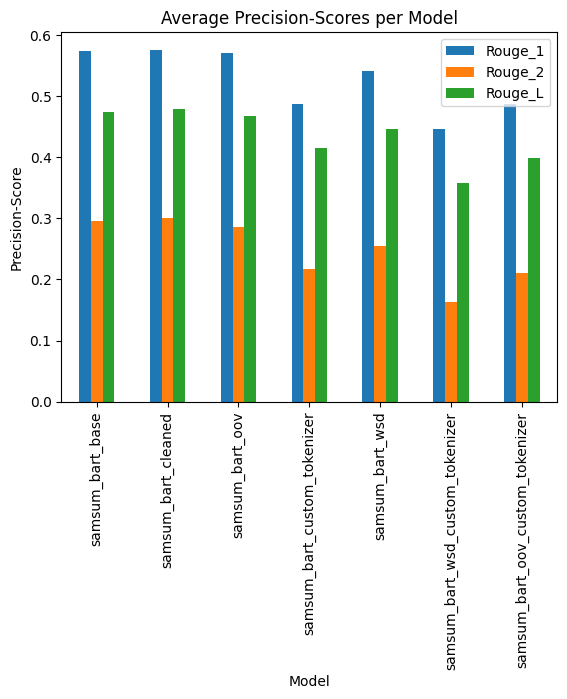

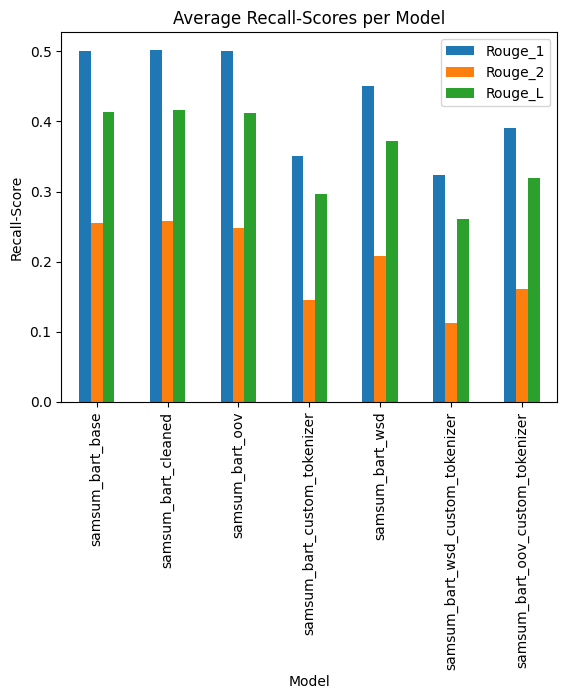

In [10]:
rouge_avg_df[rouge_avg_df['metric'] == 'F1'].plot(x='model', kind='bar')
plt.title("Average F1-Scores per Model")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.show()

rouge_avg_df[rouge_avg_df['metric'] == 'Precision'].plot(x='model', kind='bar')
plt.title("Average Precision-Scores per Model")
plt.ylabel("Precision-Score")
plt.xlabel("Model")
plt.show()

rouge_avg_df[rouge_avg_df['metric'] == 'Recall'].plot(x='model', kind='bar')
plt.title("Average Recall-Scores per Model")
plt.ylabel("Recall-Score")
plt.xlabel("Model")
plt.show()

In [11]:
# Plotting the readability scores for all models

def plot_readability_scores(model_metrics, models, metric: str):
    plt.figure(figsize=(10, 6))

    for model in models:

        df_readability = pd.DataFrame(model_metrics[model]['readability'][metric], columns=[metric])
        df_readability['model'] = model
        df_readability[metric].plot(kind='kde', ax=plt.gca(), label=model)



    plt.title(f'Readability Scores ({metric.upper()}) for Different Models')

    plt.xlabel(f'{metric.upper()} Score')

    plt.ylabel('Density')

    plt.legend(title='Model')

In [12]:
# plot_readability_scores(model_metrics, models, 'dcrs')
# plt.show()

# plot_readability_scores(model_metrics, models, 'fkgl')
# plt.show()

# plot_readability_scores(model_metrics, models, 'cli')
# plt.show()

# Training loss


In [13]:
from evaluation import get_trainer_state_of_latest_checkpoint, get_loss_per_epoch

trainer_states_per_model = {}
loss_per_model = {}
for model in models:
    trainer_states_per_model[model] = get_trainer_state_of_latest_checkpoint(model)
    loss_per_model[model] = get_loss_per_epoch(trainer_states_per_model[model])

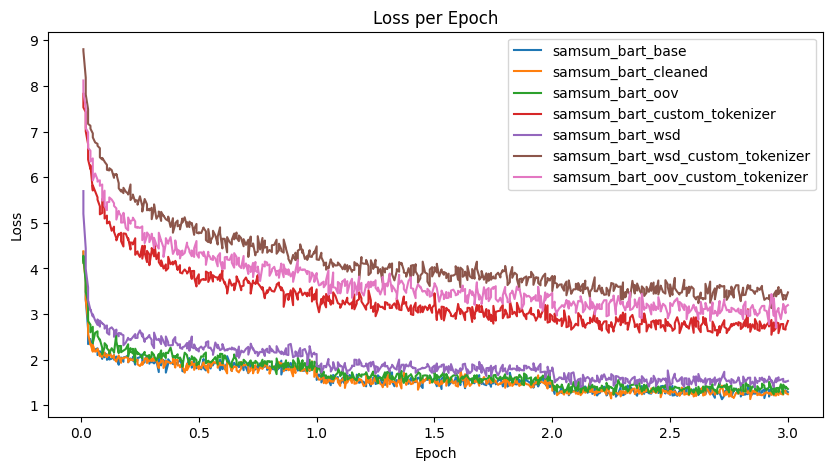

In [14]:

fig, ax = plt.subplots(figsize=(10, 5))
for model in models:
    loss_per_model[model][['loss', 'epoch']].plot(x='epoch', y='loss', ax=ax, label=model)
ax.set_title(f"Loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
plt.show()

# BERT Scores

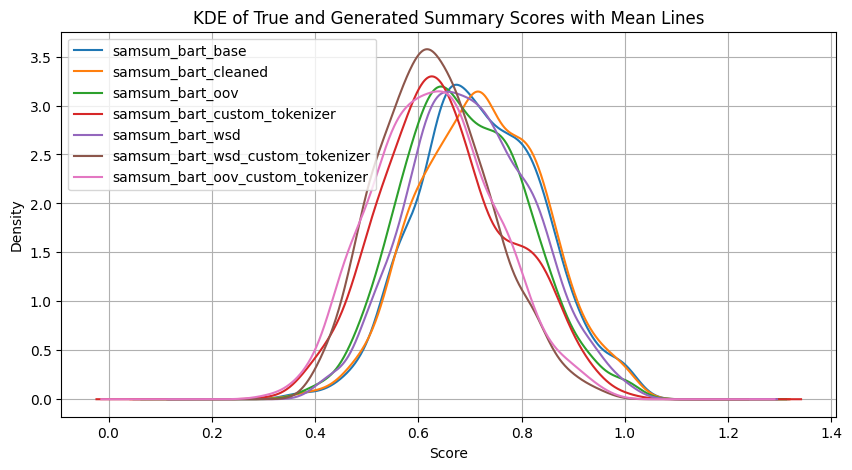

In [15]:
#analyse the bert scores
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for model in models:
    bert_df = pd.DataFrame(model_metrics[model]['relevance']['bert'], columns=[model])
    
    bert_df.plot(kind="kde", ax=ax, label=model, legend=True)
    
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('KDE of True and Generated Summary Scores with Mean Lines')
plt.grid(True)
    
plt.show()

In [16]:
bert_data = {model: model_metrics[model]['relevance']['bert'] for model in models}

bert_df = pd.DataFrame(bert_data)

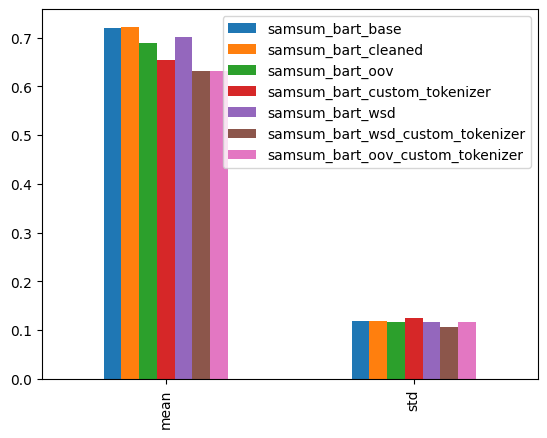

In [17]:
bert_agg_df = bert_df.agg(['mean', 'std'])
bert_agg_df.plot(kind='bar', legend=True)

plt.show()

In [18]:
bert_agg_df.transpose().to_latex("bert_agg_df.tex")

# ROUGE Stastistik

In [19]:
rouge_avg_df[rouge_avg_df['metric'] == 'F1'].drop('metric', axis=1).drop('model', axis=1).corr()


,Rouge_1,Rouge_2,Rouge_L
Rouge_1,1.000000,0.995039,0.995790
Rouge_2,0.995039,1.000000,0.998497
Rouge_L,0.995790,0.998497,1.000000


In [22]:
import numpy as np
from scipy.stats import ttest_ind

In [41]:
rouge_f1_data = {model: model_metrics[model]['relevance']['rouge']['rouge_1']['f1'] for model in models}
rouge_f1_df = pd.DataFrame(rouge_f1_data)

rouge_f1_df

,samsum_bart_base,samsum_bart_cleaned,samsum_bart_oov,samsum_bart_custom_tokenizer,samsum_bart_wsd,samsum_bart_wsd_custom_tokenizer,samsum_bart_oov_custom_tokenizer
0,0.410256,0.551724,0.324324,0.250000,0.470588,0.312500,0.344828
1,0.370370,0.695652,0.500000,0.173913,0.370370,0.800000,0.320000
2,0.266667,0.250000,0.423077,0.157895,0.243902,0.285714,0.318182
3,0.666667,0.727273,0.666667,0.210526,0.666667,0.615385,0.315789
4,0.350877,0.482759,0.327869,0.266667,0.379310,0.317460,0.473684
...,...,...,...,...,...,...,...
814,0.430769,0.514286,0.563380,0.387097,0.477612,0.400000,0.387097
815,0.909091,0.909091,0.782609,0.640000,0.666667,0.285714,0.842105
816,0.461538,0.461538,0.461538,0.105263,0.333333,0.142857,0.545455
817,0.456140,0.509091,0.564103,0.488889,0.558140,0.296296,0.347826


In [57]:
# Loop over each model and perform t-test against the base model
def t_test_matrix_rouge(models):
    t_test_results = []
    base_model = 'samsum_bart_base'

    for model in models:
        if model != base_model:
            
            t_test_result = {'Model': model}
            for rouge_type in ['rouge_1', 'rouge_2', 'rouge_l']:
    
                rouge_f1_data = {model: model_metrics[model]['relevance']['rouge'][rouge_type]['f1'] for model in models}
                rouge_f1_df = pd.DataFrame(rouge_f1_data)
            
                # Extract ROUGE-1 F1 scores for the base model and the current model
                base_scores = rouge_f1_df[base_model].dropna()
                model_scores = rouge_f1_df[model].dropna()
                
                # Ensure that both series have the same length
                # If not, align them by index or handle accordingly
                min_length = min(len(base_scores), len(model_scores))
                base_scores = base_scores.iloc[:min_length]
                model_scores = model_scores.iloc[:min_length]
                
                # Perform the independent t-test (Welch's t-test)
                t_stat, p_value = ttest_ind(base_scores, model_scores, equal_var=False)
                
                t_test_result[rouge_type] = p_value
            
            # Append the results to the list
            t_test_results.append(t_test_result)

    # Create a DataFrame from the t-test results
    t_test_df = pd.DataFrame(t_test_results)

    return t_test_df

In [58]:
t_test_df = t_test_matrix_rouge(models)

In [66]:
t_test_df.to_latex(index=False, buf="t_test_f1.tex")

In [49]:
pd.DataFrame([p_vals], columns = rouge_f1_df.columns, index = ['rouge_f1'])

,samsum_bart_base,samsum_bart_cleaned,samsum_bart_oov,samsum_bart_custom_tokenizer,samsum_bart_wsd,samsum_bart_wsd_custom_tokenizer,samsum_bart_oov_custom_tokenizer
rouge_f1,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# BERT Statistik

In [67]:
bert_df

,samsum_bart_base,samsum_bart_cleaned,samsum_bart_oov,samsum_bart_custom_tokenizer,samsum_bart_wsd,samsum_bart_wsd_custom_tokenizer,samsum_bart_oov_custom_tokenizer
0,0.641915,0.764370,0.551712,0.568527,0.632257,0.622719,0.562791
1,0.648744,0.785061,0.630131,0.505355,0.603669,0.802587,0.473569
2,0.563690,0.557842,0.610282,0.551208,0.631055,0.541758,0.551357
3,0.757500,0.803504,0.749051,0.613971,0.757500,0.668441,0.583979
4,0.741567,0.882931,0.659513,0.703813,0.733893,0.715898,0.721604
...,...,...,...,...,...,...,...
814,0.718806,0.782039,0.722758,0.657578,0.810140,0.650587,0.657965
815,0.978408,0.978408,0.690285,0.671496,0.884691,0.581548,0.902199
816,0.443720,0.447915,0.520361,0.542053,0.541325,0.472592,0.447169
817,0.568641,0.664162,0.669095,0.587218,0.649085,0.537978,0.515770


In [68]:
def t_test_matrix_bert(models):
    t_test_results = []
    base_model = 'samsum_bart_base'

    for model in models:
        if model != base_model:
        
            # Extract ROUGE-1 F1 scores for the base model and the current model
            base_scores = bert_df[base_model].dropna()
            model_scores = bert_df[model].dropna()
            
            # Ensure that both series have the same length
            # If not, align them by index or handle accordingly
            min_length = min(len(base_scores), len(model_scores))
            base_scores = base_scores.iloc[:min_length]
            model_scores = model_scores.iloc[:min_length]
            
            # Perform the independent t-test (Welch's t-test)
            _, p_value = ttest_ind(base_scores, model_scores, equal_var=False)
            
            # Append the results to the list
            t_test_results.append({
                'Model': model,
                'P-value': p_value
            })

    # Create a DataFrame from the t-test results
    bert_t_test_df = pd.DataFrame(t_test_results)

    return bert_t_test_df

In [72]:
bert_t_test_df = t_test_matrix_bert(models)
print(bert_t_test_df)

                              Model       P-value
0               samsum_bart_cleaned  6.848621e-01
1                   samsum_bart_oov  3.199905e-07
2      samsum_bart_custom_tokenizer  5.548659e-27
3                   samsum_bart_wsd  1.538545e-03
4  samsum_bart_wsd_custom_tokenizer  1.204199e-51
5  samsum_bart_oov_custom_tokenizer  1.933853e-49


In [71]:
bert_t_test_df.to_latex(index=False, buf="t_test_bert.tex")